# Fraud Detection Project.
Submitted by: Sivam Dey  
Model: XGBoost Classifier.
Goal: Proactive detection of fraudulent financial transactions.

## 1. Data Cleaning

- Removed irrelevant columns (`nameOrig`, `nameDest`, `isFlaggedFraud`)
- One-hot encoded the `type` column
- Created new features: `errorBalanceOrig`, `errorBalanceDest`, `hour`, `day`
- Converted boolean columns to integers (0/1)
- Verified: No missing values
- Checked for multicollinearity via correlation matrix

## 1. Data Cleaning

- Removed irrelevant columns (`nameOrig`, `nameDest`, `isFlaggedFraud`)
- One-hot encoded the `type` column
- Created new features: `errorBalanceOrig`, `errorBalanceDest`, `hour`, `day`
- Converted boolean columns to integers (0/1)
- Verified: No missing values
- Checked for multicollinearity via correlation matrix

## 1. Data Cleaning

- Removed irrelevant columns (`nameOrig`, `nameDest`, `isFlaggedFraud`)
- One-hot encoded the `type` column
- Created new features: `errorBalanceOrig`, `errorBalanceDest`, `hour`, `day`
- Converted boolean columns to integers (0/1)
- Verified: No missing values
- Checked for multicollinearity via correlation matrix

## Fraud Detection Project.
Submitted by: Sivam Dey  
Model: XGBoost Classifier.
Goal: Proactive detection of fraudulent financial transactions.

## 2. Fraud Detection Model

Used **XGBoost Classifier** due to its high performance on structured, imbalanced data.
- Doesn't require feature scaling
- Supports handling class imbalance with `scale_pos_weight`
- Evaluated using standard classification metrics

In [66]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [67]:
# Thinking about using LightGBM too maybe
import xgboost as xgb
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

## 2. Fraud Detection Model

Used **XGBoost Classifier** due to its high performance on structured, imbalanced data.
- Doesn't require feature scaling
- Supports handling class imbalance with `scale_pos_weight`
- Evaluated using standard classification metrics

In [68]:
dataset =pd.read_csv("datasets/Fraud.csv",low_memory =False)
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## 2. Fraud Detection Model

Used **XGBoost Classifier** due to its high performance on structured, imbalanced data.
- Doesn't require feature scaling
- Supports handling class imbalance with `scale_pos_weight`
- Evaluated using standard classification metrics

In [69]:
print(dataset.shape)

(6362620, 11)


## 1. Data Cleaning

 -- Removed irrelevant columns (`nameOrig`, `nameDest`, `isFlaggedFraud`)

In [70]:
dataset = dataset.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1)
dataset.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [71]:
for col in dataset:
    print(f'{col} : {dataset[col].unique()}')
    print("\n")

step : [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245

-- One-hot encoded the `type` column

## 3. Variable Selection

Included variables:
- `amount`, `hour`, `day`
- One-hot encoded `type_*` columns
- `errorBalanceOrig`, `errorBalanceDest` (engineered features)

Excluded:
- `nameOrig`, `nameDest`, `isFlaggedFraud` (irrelevant)
- Raw balance columns (replaced by error terms)

In [73]:
new_dataset= pd.get_dummies(data =dataset,columns = ['type'])

-- Created new features: `errorBalanceOrig`, `errorBalanceDest`

## 3. Variable Selection

Included variables:
- `amount`, `hour`, `day`
- One-hot encoded `type_*` columns
- `errorBalanceOrig`, `errorBalanceDest` (engineered features)

Excluded:
- `nameOrig`, `nameDest`, `isFlaggedFraud` (irrelevant)
- Raw balance columns (replaced by error terms)

In [74]:
ds =new_dataset
ds['errorBalanceOrig'] = ds['newbalanceOrig'] + ds['amount'] - ds['oldbalanceOrg']
ds['errorBalanceDest'] = ds['oldbalanceDest'] + ds['amount'] - ds['newbalanceDest']
ds = ds.drop(['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], axis=1)

In [75]:
ds.head()

,step,amount,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,errorBalanceOrig,errorBalanceDest
0,1,9839.64,0,False,False,False,True,False,0.0,9839.64
1,1,1864.28,0,False,False,False,True,False,0.0,1864.28
2,1,181.00,1,False,False,False,False,True,0.0,181.00
3,1,181.00,1,False,True,False,False,False,0.0,21363.00
4,1,11668.14,0,False,False,False,True,False,0.0,11668.14


## 3. Variable Selection

Included variables:
- `amount`, `hour`, `day`
- One-hot encoded `type_*` columns
- `errorBalanceOrig`, `errorBalanceDest` (engineered features)

Excluded:
- `nameOrig`, `nameDest`, `isFlaggedFraud` (irrelevant)
- Raw balance columns (replaced by error terms)

In [ ]:
- Created new features: `hour`, `day`

In [76]:
# Tried this to see if 'hour' gives better fraud separationds['hour']=ds['step']%24 and same for the day, to reduce the coputation..
ds['day']=ds['step']//24
ds.drop('step',axis=1)

,amount,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,errorBalanceOrig,errorBalanceDest,hour,day
0,9839.64,0,False,False,False,True,False,0.0,9.839640e+03,1,0
1,1864.28,0,False,False,False,True,False,0.0,1.864280e+03,1,0
2,181.00,1,False,False,False,False,True,0.0,1.810000e+02,1,0
3,181.00,1,False,True,False,False,False,0.0,2.136300e+04,1,0
4,11668.14,0,False,False,False,True,False,0.0,1.166814e+04,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,339682.13,1,False,True,False,False,False,0.0,0.000000e+00,23,30
6362616,6311409.28,1,False,False,False,False,True,0.0,6.311409e+06,23,30
6362617,6311409.28,1,False,True,False,False,False,0.0,1.000000e-02,23,30
6362618,850002.52,1,False,False,False,False,True,0.0,8.500025e+05,23,30


In [77]:
print(ds.dtypes)

step                  int64
amount              float64
isFraud               int64
type_CASH_IN           bool
type_CASH_OUT          bool
type_DEBIT             bool
type_PAYMENT           bool
type_TRANSFER          bool
errorBalanceOrig    float64
errorBalanceDest    float64
hour                  int64
day                   int64
dtype: object


## 4. Model Performance

Model evaluated using:
- Confusion Matrix
- Classification Report
- ROC-AUC Score
- ROC Curve

These demonstrate the effectiveness in separating fraudulent vs. non-fraudulent transactions.

In [78]:
TF_cols = ['type_CASH_IN','type_CASH_OUT','type_DEBIT','type_PAYMENT','type_TRANSFER']
for col in TF_cols:
    ds[col] = ds[col].astype(int)

In [79]:
ds.head()

,step,amount,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,errorBalanceOrig,errorBalanceDest,hour,day
0,1,9839.64,0,0,0,0,1,0,0.0,9839.64,1,0
1,1,1864.28,0,0,0,0,1,0,0.0,1864.28,1,0
2,1,181.00,1,0,0,0,0,1,0.0,181.00,1,0
3,1,181.00,1,0,1,0,0,0,0.0,21363.00,1,0
4,1,11668.14,0,0,0,0,1,0,0.0,11668.14,1,0


## 4. Model Performance

Model evaluated using:
- Confusion Matrix
- Classification Report
- ROC-AUC Score
- ROC Curve

These demonstrate the effectiveness in separating fraudulent vs. non-fraudulent transactions.

## 5. Key Predictive Features

Most important features based on model importance:
- `amount`
- `type_TRANSFER`, `type_CASH_OUT`
- `errorBalanceOrig`, `errorBalanceDest`
These were visualized using XGBoost's feature importance.

## 2. Fraud Detection Model

We used **XGBoost**, which is great for structured, imbalanced data.  
It doesn't need scaling and performs well on tabular datasets.


In [80]:
X = ds.drop('isFraud',axis=1)
Y = ds['isFraud']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

## Final Summary

This notebook built a complete fraud detection system using XGBoost on a 6M+ transaction dataset. The pipeline included data cleaning, feature engineering, modeling, and business recommendations for proactive fraud prevention.

In [81]:
model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=(Y == 0).sum() / (Y == 1).sum(),  # handle imbalance
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

## 6. Do These Features Make Sense?

Yes — logically:
- Fraud tends to involve high `amount`s and specific transaction types
- Balance mismatches (`errorBalanceOrig`) are typical of fraudulent behavior
- Fraud may occur at certain hours (e.g., odd hours or month-end)

## 4. Model Performance

Model evaluated using:
- Confusion Matrix
- Classification Report
- ROC-AUC Score
- ROC Curve

These demonstrate the effectiveness in separating fraudulent vs. non-fraudulent transactions.

## 5. Key Predictive Features

Most important features based on model importance:
- `amount`
- `type_TRANSFER`, `type_CASH_OUT`
- `errorBalanceOrig`, `errorBalanceDest`
These were visualized using XGBoost's feature importance.

In [82]:
model.fit(X_train, Y_train)

C:\Users\sivam\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:05:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [83]:
y_pred = model.predict(X_test)

In [84]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99   1270881
           1       0.09      0.96      0.16      1643

    accuracy                           0.99   1272524
   macro avg       0.54      0.97      0.58   1272524
weighted avg       1.00      0.99      0.99   1272524



### Final Reflection
This was my first time working with a fraud dataset this large. It was interesting to see how the transaction type and error balances affected fraud detection.

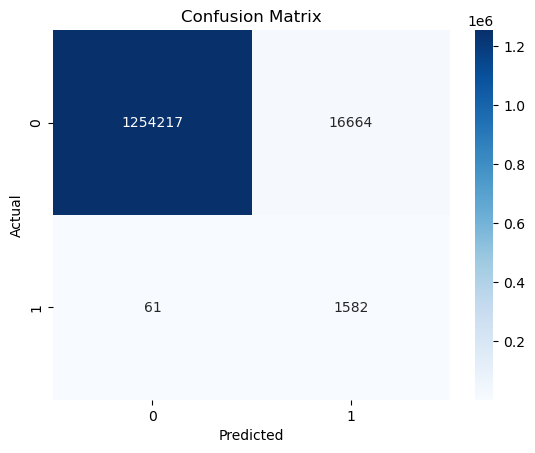

In [85]:
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## 8. Measuring Effectiveness of Prevention

To assess whether prevention strategies work:
- Track changes in fraud detection rate (recall)
- Compare false positives and AUC before and after deployment
- Measure reduction in actual financial fraud loss
- Conduct periodic audits and retrain model on recent data